# Day 08. Exercise 05
# Clustering

## 0. Imports

In [576]:
import pandas as pd
import numpy as np

In [577]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import gridplot
from bokeh.palettes import Category10
output_notebook()

Loading BokehJS ...

In [578]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score

## 1. Preprocessing

1. Считайте файл [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) в кадр данных.
2. Удалите `pageviews`, мы будем кластеризовать пользователей только по количеству коммитов и их средней разнице.

In [579]:
df = pd.read_csv('../data/regression.csv')
df.drop('pageviews', axis=1, inplace=True)
df = df.rename(columns={'AVG(diff)': 'AVG_diff'})
df.head()

,uid,num_commits,AVG_diff
0,user_1,62,-64.400000
1,user_10,20,-74.800000
2,user_14,61,-159.000000
3,user_17,51,-61.600000
4,user_18,5,-5.666667


## 2. KMeans

1. Ознакомьтесь с документацией о том, как работает этот алгоритм.
2. Используйте этот алгоритм для создания кластеров, используя `random_state=21` и `n_clusters=3`.
3. Визуализируйте данные на `диаграмме рассеяния`.
4. Попробуйте разные значения `n_clusters` и посмотрите, как изменится ваш график.
5. Рассчитайте показатель `силуэта_оценки` (проверьте документацию о метрике).

In [580]:
model = KMeans(n_clusters=3, random_state=21)
model.fit(df[['num_commits', 'AVG_diff']])
df['cluster'] = model.predict(df[['num_commits', 'AVG_diff']])
score = silhouette_score(df[['num_commits', 'AVG_diff']], df['cluster'], random_state=21)
print(f'Silhouette score = {score}')

Silhouette score = 0.4454402135233297


In [581]:
def kmeans_model(n, df):
    model = KMeans(n_clusters=n, random_state=21)
    model.fit(df[['num_commits', 'AVG_diff']])
    df['cluster'] = model.predict(df[['num_commits', 'AVG_diff']])

In [582]:
def scatter_plot_kmeans(n, df):
    fig = figure(title='KMeans Clustering of num_commits and AVG_diff',
                 x_axis_label='num_commits',
                 y_axis_label='AVG_diff',
                 width=600, height=400)

    colors = Category10[10][:n]
    for i, color in enumerate(colors):
        cluster_data = df[df['cluster'] == i]
        source = ColumnDataSource(cluster_data)
        fig.scatter('num_commits', 'AVG_diff', size=10, color=color, legend_label=f'Cluster {i}', source=source)

    fig.legend.location = 'top_right'
    fig.legend.click_policy = 'hide'

    hover = HoverTool()
    hover.tooltips = [
        ('X', '@num_commits'),
        ('Y', '@AVG_diff'),
    ]
    fig.add_tools(hover)

    return fig

In [583]:
kmeans_model(2, df)
fig1 = scatter_plot_kmeans(2, df)

kmeans_model(3, df)
fig2 = scatter_plot_kmeans(3, df)

kmeans_model(5, df)
fig3 = scatter_plot_kmeans(5, df)

kmeans_model(10, df)
fig4 = scatter_plot_kmeans(10, df)

grid = gridplot([[fig1, fig2], [fig3, fig4]])
show(grid)

## 3. DBSCAN

1. Ознакомьтесь с документацией о том, как работает этот алгоритм.
2. Используйте этот алгоритм для создания кластеров с `eps=20` и `min_samples=2`.
3. Визуализируйте данные на `диаграмме рассеяния`.
4. Попробуйте разные значения `eps` и `min_samples` и посмотрите, как изменится ваш график.
5. Рассчитайте показатель `silhouette_score (проверьте документацию о метрике).

In [584]:
model = DBSCAN(eps=20, min_samples=2)
df['cluster'] = model.fit_predict(df[['num_commits', 'AVG_diff']])
score = silhouette_score(df[['num_commits', 'AVG_diff']], df['cluster'], random_state=21)
print(f'Silhouette score = {score}')

Silhouette score = 0.38339641455696616


In [585]:
def dbscan_model(e, n, df):
    model = DBSCAN(eps=e, min_samples=n)
    df['cluster'] = model.fit_predict(df[['num_commits', 'AVG_diff']])

In [586]:
def scatter_plot_dbscan(df):
    fig = figure(title='DBSCAN Clustering of num_commits and AVG_diff',
                 x_axis_label='num_commits',
                 y_axis_label='AVG_diff',
                 width=600, height=400)

    unique_clusters = df['cluster'].unique()
    unique_clusters = unique_clusters[unique_clusters != -1]
    colors = Category10[10][:len(unique_clusters)]

    for i, color in zip(unique_clusters, colors):
        cluster_data = df[df['cluster'] == i]
        source=ColumnDataSource(cluster_data)
        fig.scatter('num_commits', 'AVG_diff', size=10, color=color, legend_label=f'Cluster {i}', source=source)

    noise_data = df[df['cluster'] == -1]
    if not noise_data.empty:
        fig.scatter('num_commits', 'AVG_diff', size=6, color='black', legend_label='Noise', source=ColumnDataSource(noise_data))

    fig.legend.location = 'top_right'
    fig.legend.click_policy = 'hide'

    hover = HoverTool()
    hover.tooltips = [
        ('X', '@num_commits'),
        ('Y', '@AVG_diff'),
    ]
    fig.add_tools(hover)

    return fig

In [587]:
dbscan_model(10, 2, df)
fig1 = scatter_plot_dbscan(df)

dbscan_model(20, 2, df)
fig2 = scatter_plot_dbscan(df)

dbscan_model(20, 3, df)
fig3 = scatter_plot_dbscan(df)

dbscan_model(30, 4, df)
fig4 = scatter_plot_dbscan(df)

grid = gridplot([[fig1, fig2], [fig3, fig4]])
show(grid)

## 4. Hierarchical (AgglomerativeClustering)

1. Используйте этот алгоритм для создания кластеров с `n_clusters=5`.
2. Визуализируйте данные на `диаграмме рассеяния`.
3. Попробуйте разные значения `n_clusters` и посмотрите, как изменится ваш график.
4. Рассчитайте показатель `силуэт_оценки`.
5. Визуализируйте `дендрограмму`.

In [588]:
model = AgglomerativeClustering(n_clusters=5)
df['cluster'] = model.fit_predict(df[['num_commits', 'AVG_diff']])
score = silhouette_score(df[['num_commits', 'AVG_diff']], df['cluster'], random_state=21)
print(f'Silhouette score = {score}')

Silhouette score = 0.46383015199381467


In [589]:
def AC_model(n, df):
    model = AgglomerativeClustering(n_clusters=n)
    df['cluster'] = model.fit_predict(df[['num_commits', 'AVG_diff']])

In [590]:
def scatter_plot_AC(n, df):
    fig = figure(title='Agglomerative Clustering of num_commits and AVG_diff',
                 x_axis_label='num_commits',
                 y_axis_label='AVG_diff',
                 width=600, height=400)

    colors = Category10[10][:n]
    for i, color in enumerate(colors):
        cluster_data = df[df['cluster'] == i]
        source=ColumnDataSource(cluster_data)
        fig.scatter('num_commits', 'AVG_diff', size=10, color=color, legend_label=f'Cluster {i}', source=source)

    fig.legend.location = 'top_right'
    fig.legend.click_policy = 'hide'

    hover = HoverTool()
    hover.tooltips = [
        ('X', '@num_commits'),
        ('Y', '@AVG_diff'),
    ]
    fig.add_tools(hover)

    return fig

In [591]:
AC_model(2, df)
fig1 = scatter_plot_AC(2, df)

AC_model(3, df)
fig2 = scatter_plot_AC(3, df)

AC_model(5, df)
fig3 = scatter_plot_AC(5, df)

AC_model(10, df)
fig4 = scatter_plot_AC(10, df)

grid = gridplot([[fig1, fig2], [fig3, fig4]])
show(grid)

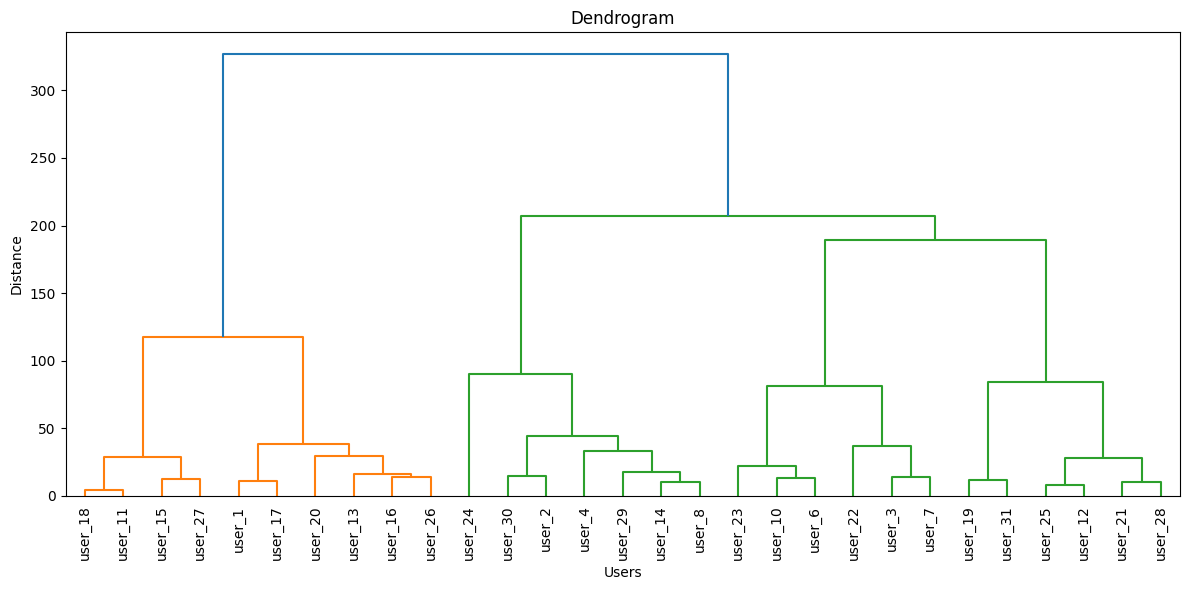

In [592]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

x = df[['num_commits', 'AVG_diff']]
Z = linkage(x, method='ward')

plt.figure(figsize=(12, 6))
plt.title('Dendrogram')
plt.xlabel('Users')
plt.ylabel('Distance')

dendrogram(Z, labels=df['uid'].values, leaf_rotation=90)
plt.tight_layout()
plt.show()

## 5. Function

Напишите функцию, которая:
1. Принимает в качестве аргументов: класс модели кластеризации, ее параметры, имя параметра для оптимизации, диапазон значений параметра для перебора.
2. Пробует различные значения из заданного диапазона параметров и вычисляет `silhouette_score для каждого значения из диапазона.
3. Находит наилучшее значение параметра в диапазоне.
4. Возвращает две подплощадки:


- первая показывает, как изменяется `silhouette_score в зависимости от значения параметра,
- второй визуализирует данные на диаграмме рассеяния, используя модель кластеризации с наилучшим значением параметра.

In [593]:
def func(model_class, params, param_name, param_range, x):

    df = x.copy()
    scores = []
    best_score = 0
    best_model = None
    model = model_class(**params)

    for value in param_range:
        model.set_params(**{param_name: value})
        df['cluster'] = model.fit_predict(x)
        try:
            scores.append(silhouette_score(x, df['cluster'], random_state=21))
        except:
            scores.append(0)

        if score > best_score:
            best_score = score
            best_model = model


    source = ColumnDataSource(data=dict(x=param_range, y=scores))
    fig1 = figure(title=f'Динамика silhouette_score при изменении {param_name}', x_axis_label='param_range', y_axis_label='silhouette_score', width=600, height=400)
    fig1.line('x', 'y', source=source, line_width=2, color='blue')
    fig1.scatter('x', 'y', source=source, size=8, color='red')

    hover = HoverTool()
    hover.tooltips = [
        ('X', '@x'),
        ('Y', '@y'),
    ]
    fig1.add_tools(hover)

    if model_class == KMeans:
        fig2 = scatter_plot_kmeans(best_model.get_params()['n_clusters'], df)
    elif model_class == DBSCAN:
        fig2 = scatter_plot_dbscan(df)
    elif model_class == AgglomerativeClustering:
        fig2 = scatter_plot_AC(best_model.get_params()['n_clusters'], df)

    grid = gridplot([[fig1, fig2]])
    show(grid)

In [594]:
x = df[['num_commits', 'AVG_diff']]
params={'random_state': 42, 'init': 'k-means++'}
param_name = 'n_clusters'
param_range = [2, 5, 10]
best_model = func(KMeans, params, param_name, param_range, x)

In [595]:
x = df[['num_commits', 'AVG_diff']]
params = {'min_samples': 2}
param_name = 'eps'
param_range = [2, 5, 10, 20]
func(DBSCAN, params, param_name, param_range, x)

In [596]:
x = df[['num_commits', 'AVG_diff']]
params = {'linkage': 'single'}
param_name = 'n_clusters'
param_range = [2, 4, 6]
func(AgglomerativeClustering, params, param_name, param_range, x)